In [1]:
import os
import imageio
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import sys
sys.path.insert(1, '../data/coco/PythonAPI/')
from pycocotools.coco import COCO
from cfgs.config import cfg

In [2]:
coco = COCO("coco/annotations/person_keypoints_train2017.json")

loading annotations into memory...
Done (t=6.38s)
creating index...
index created!


In [3]:
img_id = 262146

In [4]:
img_dict = coco.imgs[img_id]

In [5]:
img_dict

{'coco_url': 'http://images.cocodataset.org/train2017/000000262146.jpg',
 'date_captured': '2013-11-19 23:07:16',
 'file_name': '000000262146.jpg',
 'flickr_url': 'http://farm6.staticflickr.com/5090/5341741494_1f653cdb80_z.jpg',
 'height': 640,
 'id': 262146,
 'license': 1,
 'width': 480}

In [6]:
img_anns = coco.loadAnns(coco.getAnnIds(imgIds = img_id))

In [7]:
len(coco.getAnnIds(imgIds = img_id))

1

In [12]:
dir_name = cfg.train_images_dir

In [13]:
img_name = coco.imgs[img_id]['file_name']

In [14]:
img_path = os.path.join(dir_name, img_name)

In [15]:
img = imageio.imread(img_path)

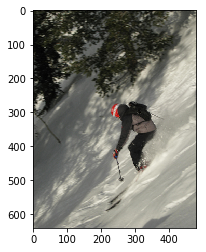

In [16]:
plt.imshow(img)

In [17]:
h, w, c = img.shape

In [18]:
mask_all = np.zeros((h, w), dtype=np.uint8)
mask_miss = np.zeros((h, w), dtype=np.uint8)

In [19]:
len(img_anns)

1

In [20]:
person = img_anns[0]

In [21]:
person.keys()

dict_keys(['area', 'image_id', 'category_id', 'segmentation', 'bbox', 'id', 'keypoints', 'num_keypoints', 'iscrowd'])

In [22]:
len(person['keypoints'])

51

In [27]:
person['keypoints']

[250,
 318,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 244,
 307,
 2,
 0,
 0,
 0,
 276,
 309,
 2,
 291,
 289,
 2,
 269,
 366,
 2,
 325,
 282,
 2,
 252,
 404,
 2,
 301,
 276,
 2,
 330,
 360,
 2,
 347,
 345,
 2,
 290,
 403,
 2,
 307,
 400,
 2,
 309,
 458,
 2,
 326,
 440,
 2]

In [24]:
coco.getCatIds()

[1]

In [25]:
cats = coco.loadCats([1])

In [26]:
cats

[{'id': 1,
  'keypoints': ['nose',
   'left_eye',
   'right_eye',
   'left_ear',
   'right_ear',
   'left_shoulder',
   'right_shoulder',
   'left_elbow',
   'right_elbow',
   'left_wrist',
   'right_wrist',
   'left_hip',
   'right_hip',
   'left_knee',
   'right_knee',
   'left_ankle',
   'right_ankle'],
  'name': 'person',
  'skeleton': [[16, 14],
   [14, 12],
   [17, 15],
   [15, 13],
   [12, 13],
   [6, 12],
   [7, 13],
   [6, 7],
   [6, 8],
   [7, 9],
   [8, 10],
   [9, 11],
   [2, 3],
   [1, 2],
   [1, 3],
   [2, 4],
   [3, 5],
   [4, 6],
   [5, 7]],
  'supercategory': 'person'}]

In [38]:
person['bbox']

[292.99, 95.29, 72.07, 232.31]

In [40]:
mask = coco.annToMask(person)

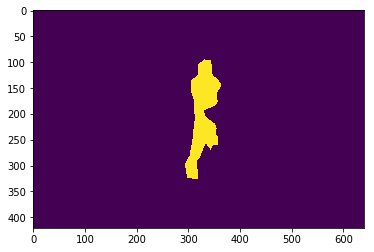

In [43]:
plt.imshow(mask)

In [45]:
person['bbox']

[292.99, 95.29, 72.07, 232.31]